<a href="https://colab.research.google.com/github/ashikshafi08/Learning_Tensorflow/blob/main/Exercise%20Solutions/%F0%9F%9B%A0_04_Transfer_Learning_with_TensorFlow_Part_1_Feature_Extraction_Exercise_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠 Transfer Learning with TensorFlow Part 1: Feature Extraction Exercise Solutions 

1. Build and fit a model using the same data we have here but with the MobileNetV2 architecture feature extraction ([`mobilenet_v2_100_224/feature_vector`](https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5)) from TensorFlow Hub, how does it perform compared to our other models?

2. Name 3 different image classification models on TensorFlow Hub that we haven't used.

3. Build a model to classify images of two different things you've taken photos of.
  - You can use any feature extraction layer from TensorFlow Hub you like for this.
  - You should aim to have at least 10 images of each class, for example to build a fridge versus oven classifier, you'll want 10 images of fridges and 10 images of ovens.


4. What is the current best performing model on ImageNet?
    - Hint: you might want to check [sotabench.com](https://sotabench.com/) for this.

## Getting the Data and setting things up. 

In [ ]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Get data (10% of labels)
import zipfile

# Download data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-07-05 01:24:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.128, 173.194.216.128, 173.194.217.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   170MB/s    in 0.9s    

2021-07-05 01:24:26 (170 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [ ]:
# Setting up the data loaders 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Our parameters 
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

# Getting our train and test directory 
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

# Intializing our data generator 
train_datagen = ImageDataGenerator(rescale= 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

# Loading in the data and parameters 
print('Training images..')
train_data_10_percent = train_datagen.flow_from_directory(train_dir , 
                                                          target_size = IMAGE_SHAPE ,
                                                          batch_size = BATCH_SIZE , 
                                                          class_mode = 'categorical')

print('Testing images..')
test_data = test_datagen.flow_from_directory(test_dir , 
                                             target_size = IMAGE_SHAPE , 
                                             batch_size = BATCH_SIZE , 
                                             class_mode = 'categorical')

Training images..
Found 750 images belonging to 10 classes.
Testing images..
Found 2500 images belonging to 10 classes.


### 1. Build and fit a model using the same data we have here but with the MobileNetV2 architecture feature extraction ([`mobilenet_v2_100_224/feature_vector`](https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5)) from TensorFlow Hub, how does it perform compared to our other models?

In [ ]:
# Importing tensorflow hub 
import tensorflow_hub as hub
from tensorflow.keras import layers

# MobileNet V2 Feature vector url 
mobilenet_v2_url = 'https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5'

# Downloading the pretrained model and saving it as a Keras layer 
mobilenet_feature_extraction_layer = hub.KerasLayer(mobilenet_v2_url ,
                                                    trainable = False , 
                                                    input_shape = IMAGE_SHAPE + (3,))


In [ ]:
# Building a Sequential model with our mobilenet feature extraction layer 
model = tf.keras.Sequential([
  mobilenet_feature_extraction_layer, 
  layers.Dense(train_data_10_percent.num_classes , activation= 'softmax' , name ='output_layer')                             
])

# Printing the summarr of the model 
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
# Compile
model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
# Fitting the model 
history = model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps=len(test_data)) 

Epoch 1/5
24/24 [==============================] - 89s 4s/step - loss: 1.9759 - accuracy: 0.3307 - val_loss: 1.3367 - val_accuracy: 0.6020
Epoch 2/5
24/24 [==============================] - 85s 4s/step - loss: 1.0511 - accuracy: 0.6933 - val_loss: 0.9267 - val_accuracy: 0.7324
Epoch 3/5
24/24 [==============================] - 85s 4s/step - loss: 0.7427 - accuracy: 0.7827 - val_loss: 0.7770 - val_accuracy: 0.7624
Epoch 4/5
24/24 [==============================] - 85s 4s/step - loss: 0.5830 - accuracy: 0.8440 - val_loss: 0.6951 - val_accuracy: 0.7796
Epoch 5/5
24/24 [==============================] - 85s 4s/step - loss: 0.4767 - accuracy: 0.8800 - val_loss: 0.6618 - val_accuracy: 0.7868


### 2. Name 3 different image classification models on TensorFlow Hub that we haven't used.

- Inception ResNet 
- Inception family of models
- NASNet models 
- Some of the ResNet versions of models 

https://tfhub.dev/s?module-type=image-classification&tf-version=tf2

### 3. Build a model to classify images of two different things you've taken photos of.
  - You can use any feature extraction layer from TensorFlow Hub you like for this.
  - You should aim to have at least 10 images of each class, for example to build a fridge versus oven classifier, you'll want 10 images of fridges and 10 images of ovens.

In [ ]:
# Make sure you have a dataset in your google drive
# Importing the gdrive 
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Getting the data dir path
data_dir = '/content/drive/MyDrive/CNN_dataset'

for dirpath, dirnames, filenames in os.walk(data_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in '/content/drive/MyDrive/CNN_dataset'.
There are 0 directories and 10 images in '/content/drive/MyDrive/CNN_dataset/not_hot_dog'.
There are 0 directories and 10 images in '/content/drive/MyDrive/CNN_dataset/hot_dog'.


In [ ]:
# Using the image dataset from directory to read in the data 
train_data = tf.keras.preprocessing.image_dataset_from_directory(data_dir , 
                                                                 labels = 'inferred', 
                                                                 image_size = IMAGE_SHAPE , 
                                                                 batch_size = 8)


Found 19 files belonging to 2 classes.


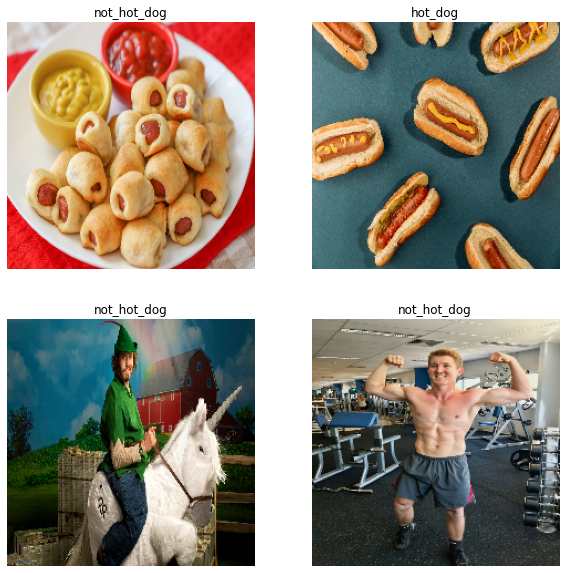

In [ ]:
# Let's visualize how our data looks like! 

plt.figure(figsize=(10, 10))
class_names = train_data.class_names
for images, labels in train_data.take(1):
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis("off")

Now let's use the above mobilenet feature extractor model to train on our custom data. 

In [ ]:
# Building a Sequential model with our mobilenet feature extraction layer for our custom data
custom_data_model = tf.keras.Sequential([
  mobilenet_feature_extraction_layer,
  layers.Dense(1 , activation= 'sigmoid' , name ='output_layer')                             
])

# Printing the summarr of the model 
custom_data_model.summary() 

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
output_layer (Dense)         (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
# Compiling the model 
custom_data_model.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                          optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001) , 
                          metrics = ['accuracy'])

In [ ]:
# Fitting the model 
custom_model_history = custom_data_model.fit(train_data , 
                      epochs = 15 )

Epoch 1/15
3/3 [==============================] - 4s 141ms/step - loss: 0.7017 - accuracy: 0.5263
Epoch 2/15
3/3 [==============================] - 2s 137ms/step - loss: 0.6365 - accuracy: 0.6316
Epoch 3/15
3/3 [==============================] - 2s 150ms/step - loss: 0.6021 - accuracy: 0.7895
Epoch 4/15
3/3 [==============================] - 2s 139ms/step - loss: 0.5707 - accuracy: 0.7895
Epoch 5/15
3/3 [==============================] - 2s 139ms/step - loss: 0.5573 - accuracy: 0.7368
Epoch 6/15
3/3 [==============================] - 2s 151ms/step - loss: 0.5378 - accuracy: 0.6842
Epoch 7/15
3/3 [==============================] - 2s 140ms/step - loss: 0.5141 - accuracy: 0.7895
Epoch 8/15
3/3 [==============================] - 2s 140ms/step - loss: 0.4693 - accuracy: 0.7895
Epoch 9/15
3/3 [==============================] - 2s 141ms/step - loss: 0.4539 - accuracy: 0.8947
Epoch 10/15
3/3 [==============================] - 2s 140ms/step - loss: 0.4404 - accuracy: 0.9474
Epoch 11/15
3/3 [==

Alright looking at the model accuracy metric we can't say much, although we got a decent accuracy let's test of our model on some random images. 

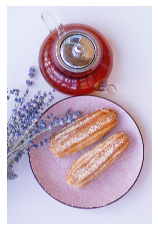

In [ ]:
import matplotlib.image as mpimg 
a = mpimg.imread('drive/MyDrive/test_imgs/elena-mozhvilo-qUmz6ncEQak-unsplash.jpg')
plt.imshow(a)
plt.axis(False);

In [ ]:
# Writing a function to import and image and resize it to be used with model predict
def load_and_prep_image(filename , img_shape = 224):
  # Read in the target image 
  img = tf.io.read_file(filename)

  # Decoding into a tensor 
  img = tf.image.decode_image(img , channels = 3)

  # Resize the image(same size as the model trained on)
  img = tf.image.resize(img , size = [img_shape , img_shape])

  # Rescale the image 
  img = img / 255.

  return img

In [ ]:
# Getting all the filepath and storing them into a variable 
not_hot_dog = 'drive/MyDrive/test_imgs/elena-mozhvilo-qUmz6ncEQak-unsplash.jpg'
hot_dog_1 = 'drive/MyDrive/test_imgs/ball-park-brand-XFs0ISsDqZw-unsplash.jpg'
hot_dog_2 = 'drive/MyDrive/test_imgs/hasmik-ghazaryan-olson-Lzs91p-qI64-unsplash.jpg'
hot_dog_3 = 'drive/MyDrive/test_imgs/peter-secan-kKXBw9Exn30-unsplash.jpg'

In [ ]:
tf.expand_dims(load_and_prep_image(hot_dog_1), axis = 0).shape , images.shape

(TensorShape([1, 224, 224, 3]), TensorShape([8, 224, 224, 3]))

In [ ]:
dum = custom_data_model.predict(tf.expand_dims(load_and_prep_image(hot_dog_1), axis = 0))
dum

array([[0.9841262]], dtype=float32)

In [ ]:
class_names[int(tf.round(dum)[0][0])]

'not_hot_dog'

In [ ]:
# Creating a function to make prediction and display it

def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img , axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

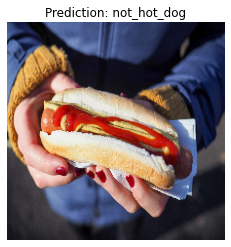

In [ ]:
# Getting our class names 
class_names = train_data.class_names

# Using the function to plot our prediction
pred_and_plot(custom_data_model , hot_dog_3 , class_names)

That's bad! It seems like though our model got good accuracy it wasn't able to generalize well. 

How to improve this? 
- Increase the number of images per class to 20 
- Create a validation set of images, where it will be having 5-8 images per class. 
- Using another architecture, maybe `EfficientNet` for better performance. 

### 4. What is the current best performing model on ImageNet?

It seems like **FixEfficientNet_L2** is the state-of-the-art model now performing really good in Image Classification task. 
  - Top 1% accuracy --> 88.5%
  - Top 5% accuracy --> 98.7%

To know more about the [FixEfficientNet_L2](https://towardsdatascience.com/state-of-the-art-image-classification-algorithm-fixefficientnet-l2-98b93deeb04c#:~:text=FixEfficientNet%20is%20a%20technique%20combining,the%20Google%20AI%20Research%20Team.&text=The%20FixEfficientNet%20has,AI%20Research%20Team%20%5B1%5D.) 

https://sotabench.com/benchmarks/image-classification-on-imagenet